In [1]:
import pandas as pd
df = pd.read_csv("simulated_transaction_2024.csv")
df.head(5)

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name
0,01/01/2023,00:00,678330503.0,2971.0,1584.0,NaN,Westport Care Home
1,01/01/2023,00:00,472213568.0,3792.0,1950.0,NaN,Barbiee Boutique
2,01/01/2023,00:00,472213568.0,3012.0,-780.0,283027736.0,NaN
3,01/01/2023,00:00,283027736.0,1787.0,780.0,472213568.0,NaN
4,01/01/2023,00:00,624500124.0,3226.0,1825.0,NaN,Fat Face


In [2]:
#Frequency of transactions for each unique value in 'Third party name' column
transaction_counts = df['Third Party Name'].value_counts()
pd.set_option('display.max_rows', None)
print(transaction_counts)

Third Party Name
Tesco                          34108
Sports Direct                  16259
Topshop                        10332
Fat Face                        9543
PureGym                         8293
Matalan                         8076
Netflix                         7780
Amazon                          7575
JustEat                         7162
Deliveroo                       6971
The Works                       6706
Five Senses Art                 5961
Revella                         5366
Starbucks                       4929
Blizzard                        4444
SquareOnix                      4387
Xbox                            4373
Mojang Studios                  4370
Disney                          3958
Blackwell's                     3853
Loosely Fitted                  3721
Grand Union BJJ                 3690
Sainsbury                       3298
Halifax                         3286
Selfridges                      3260
LBG                             3225
Sainsbury Local      

Feature Engineering as done in Dataset 1

In [3]:
#Defining a function to create a new feature to catagorize the transactions into filtered categories
def categorize(name):
    if name in ['Sports Direct','Mamas & Papas','Head','Gap Kids','Millets','HMV', 'Collector Cave', 'Etsy','Topshop', 'Fat Face', 'Matalan','Specsavers','Barbiee Boutique','Revella', 'AMAZON', 'Blackwell\'s','Reebok', 'JD Sports', 'North Face', 'Boots', 'Lloyds Pharmacy']:
        return 'Retail Stores'
    elif name in ['Netflix', 'Disney', 'Blizzard', 'Mojang Studios', 'Amazon', 'Xbox', 'Gamestation','A Cut Above',
                  'The Crown']:
        return 'Entertainment & Media'
    elif name in ['Sainsbury', 'Tesco', 'Coop Local', 'Sainsbury Local']:
        return 'Grocery'
    elif name in ['JustEat', 'Deliveroo', 'Starbucks', 'Five Senses Art', 'Coffee #1', 'Costa Coffee', 'Jollyes','Rose & Crown',
                  'Kings Arms','Frankie & Bennies']:
        return 'Food & Dining'
    elif name in ['Halifax', 'LBG', 'Premier Finance', 'CPA']:
        return 'Financial Services'
    elif name in ['PureGym', 'Grand Union BJJ', 'Selfridges','Mothercare', 'Lloyds Pharmacy',  'RugbyFields','Sunny Care Nursery', 'Remedy plus care',
                  'Vision Express', 'Pets Corner','University College Hospital']:
        return 'Health & Wellness'
    elif name in ['Blackwell\'s', 'Brilliant Brushes','Craftastic', 'A Yarn Story', 'Cass Art', 'Foyles','Lavender Primary',
                  'Green Park Academy']:
        return 'Education & Books'
    elif name in ['The Works', 'Loosely Fitted', 'Wool', 'Hobby Lobby', 'Hobbycraft', 'Happy Days Home', 'Lavender Fields']:
        return 'Home & Lifestyle'
    else:
        return 'Other Services'

#Creating a new feature 'Category' based on the function
df['Category'] = df['Third Party Name'].apply(categorize)


In [4]:
#Converting 'Amount' column to numeric, so as to perform mathematical functions     
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
category_stats = df.groupby('Category')['Amount'].agg(['mean', 'min', 'max'])
print(category_stats)

#Function for the transaction with minimum spend
def get_min_transaction_details(group):
    min_transaction = group.loc[group['Amount'] == group['Amount'].min()]
    return min_transaction[['Third Party Name', 'Amount']]

#Function for the transaction with maximum spend
def get_max_transaction_details(group):
    max_transaction = group.loc[group['Amount'] == group['Amount'].max()]
    return max_transaction[['Third Party Name', 'Amount']]

#Transactions with min and max spends for each category
min_transaction_details = df.groupby('Category').apply(get_min_transaction_details)
max_transaction_details = df.groupby('Category').apply(get_max_transaction_details)

#Statistics and transaction details
for category, stats in category_stats.iterrows():
    print(f"Category: {category}")
    print(f"Average Spend: {stats['mean']:.2f}")
    print(f"Minimum Spend: {stats['min']:.2f}")
    print("Details of Minimum Spend Transaction:")
    print(min_transaction_details.loc[category])
    print(f"Maximum Spend: {stats['max']:.2f}")
    print("Details of Maximum Spend Transaction:")
    print(max_transaction_details.loc[category])
    print("\n")

                             mean       min       max
Category                                             
Education & Books      583.612805   -280.00   5292.80
Entertainment & Media   -1.392927   -200.00   2790.00
Financial Services    -211.085043  -1395.00   5833.00
Food & Dining           17.824473   -220.00   3333.33
Grocery                -52.971540   -348.35   2780.00
Health & Wellness      149.185577   -368.20   5292.80
Home & Lifestyle        53.522854   -371.00   2970.00
Other Services          89.726793 -12240.00  12240.00
Retail Stores          -28.193264   -429.80   4167.00
Category: Education & Books
Average Spend: 583.61
Minimum Spend: -280.00
Details of Minimum Spend Transaction:
        Third Party Name  Amount
175066  Lavender Primary  -280.0
Maximum Spend: 5292.80
Details of Maximum Spend Transaction:
          Third Party Name  Amount
67      Green Park Academy  5292.8
330       Lavender Primary  5292.8
21732   Green Park Academy  5292.8
21836     Lavender Primary  

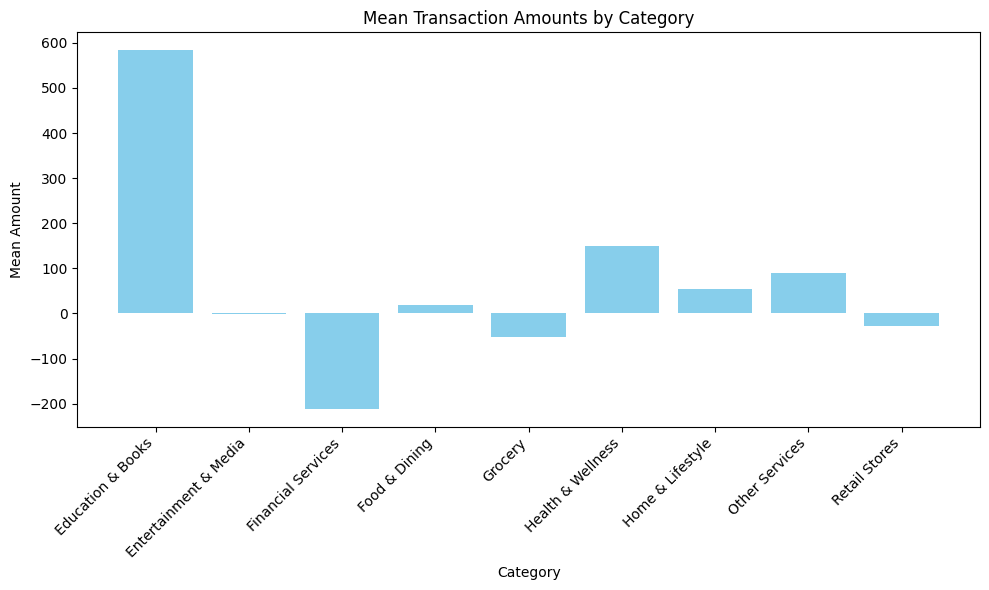

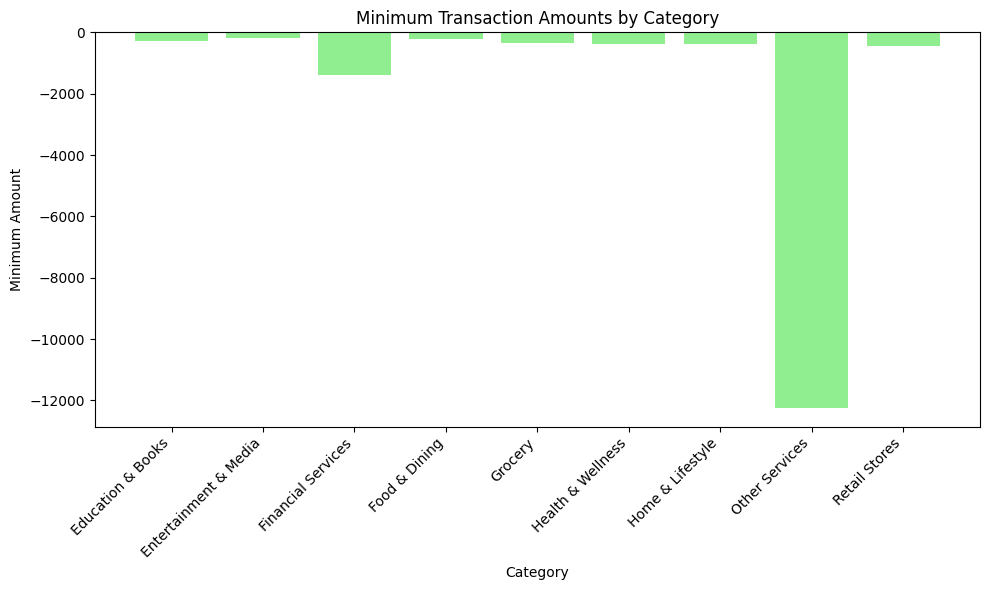

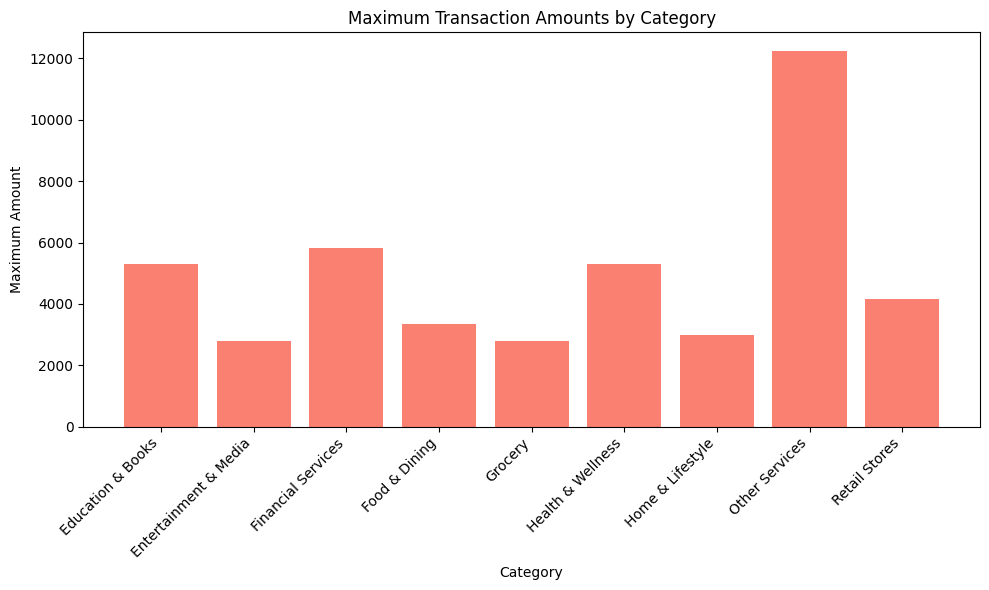

In [5]:
import matplotlib.pyplot as plt

category_stats = df.groupby('Category')['Amount'].agg(['mean', 'min', 'max']).round(2)

#Plotting mean of transactions by Category
plt.figure(figsize=(10, 6))
plt.bar(category_stats.index, category_stats['mean'], color='skyblue')
plt.title('Mean Transaction Amounts by Category')
plt.xlabel('Category')
plt.ylabel('Mean Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#Plotting min of transactions by Category
plt.figure(figsize=(10, 6))
plt.bar(category_stats.index, category_stats['min'], color='lightgreen')
plt.title('Minimum Transaction Amounts by Category')
plt.xlabel('Category')
plt.ylabel('Minimum Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#Plotting max of transactions by Category
plt.figure(figsize=(10, 6))
plt.bar(category_stats.index, category_stats['max'], color='salmon')
plt.title('Maximum Transaction Amounts by Category')
plt.xlabel('Category')
plt.ylabel('Maximum Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [6]:
#Variance for each category
category_variance = df.groupby('Category')['Amount'].var()

#Rounding the variances to three decimal places
category_variance = category_variance.round(3)
print(category_variance)

Category
Education & Books        1234485.402
Entertainment & Media      32539.520
Financial Services       2309590.214
Food & Dining              81401.547
Grocery                    31809.992
Health & Wellness         590160.388
Home & Lifestyle          160305.674
Other Services            742975.321
Retail Stores             123903.755
Name: Amount, dtype: float64


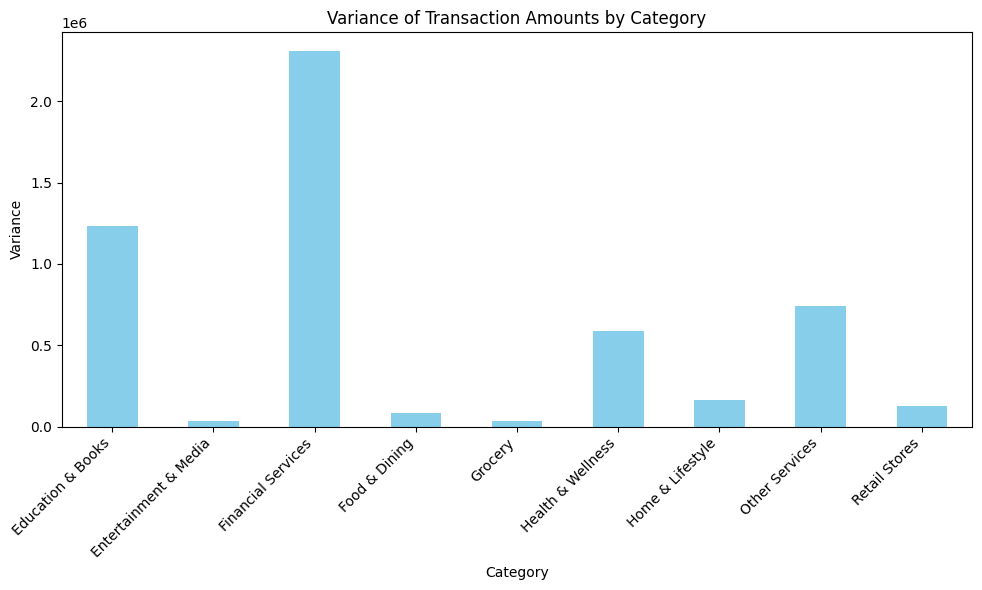

In [7]:
#Plotting variances by Categoeies
category_variance.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Variance of Transaction Amounts by Category')
plt.xlabel('Category')
plt.ylabel('Variance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

###  RFM Analysis
 This analysis involves allocationn of individual scores based on:
 * (R) recency
 * (F) frequency
 * (M) Monetary  
 
 We have used the metric, 'Quantile' to calculate the score of each of the 3 aspects, where lower than 25% is given a score of 4, lower than 50%, a 3 and so on. After calculating all the individual scores, we sum them to get a RFM score, the customers with the best RFM scores are our target customers for any new services, projects, etc

In [8]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

#Calculating the most recent date plus one day for snapshot_date
snapshot_date = df['Date'].max() + pd.DateOffset(days=1)

rfm_scores = df.groupby('Account No').agg({
    'Date': lambda x: (snapshot_date - x.max()).days,  #Recency: Days since last transaction
    'Account No': 'count',  #Frequency: Total number of transactions
    'Amount': 'sum'  #Monetary: Sum of transaction values
}).rename(columns={'Date': 'Recency', 'Account No': 'Frequency', 'Amount': 'Monetary'})

quantiles = rfm_scores.quantile(q=[0.25, 0.5, 0.75])


def assign_rfm_score(x, c, quantiles):
    if x <= quantiles.loc[0.25, c]:
        return 4 if c == 'Recency' else 1  #Lower recency is better, hence 4 is best
    elif x <= quantiles.loc[0.5, c]:
        return 3 if c == 'Recency' else 2
    elif x <= quantiles.loc[0.75, c]:
        return 2 if c == 'Recency' else 3
    else:
        return 1 if c == 'Recency' else 4  #Higher recency is worse, hence 1 is worst

rfm_scores['R_Score'] = rfm_scores['Recency'].apply(assign_rfm_score, args=('Recency', quantiles))
rfm_scores['F_Score'] = rfm_scores['Frequency'].apply(assign_rfm_score, args=('Frequency', quantiles))
rfm_scores['M_Score'] = rfm_scores['Monetary'].apply(assign_rfm_score, args=('Monetary', quantiles))

#Summing the scores to get the RFM Score
rfm_scores['RFM_Score'] = rfm_scores['R_Score'] + rfm_scores['F_Score'] + rfm_scores['M_Score']


Summing up R,F, and M Scores to get best customers from the dataset

In [9]:
#Calculate Total RFM score
rfm_scores['RFM_Score'] = rfm_scores['R_Score'] + rfm_scores['F_Score'] + rfm_scores['M_Score']

#Sorting customers by RFM score in descending order to get the best customers
best_customers = rfm_scores.sort_values(by='RFM_Score', ascending=False)
best_customers.shape


(976, 7)

In [10]:
#Top 500 customers 
top_500_customers = best_customers.head(500)
top_500_customers.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
Account No,,,,,,,
399538448.0,1,379,6965.00,4,4,4,12
719586818.0,1,336,20576.73,4,4,4,12
558119802.0,1,476,37015.18,4,4,4,12
802697323.0,1,425,17227.74,4,4,4,12
930277104.0,1,364,8672.71,4,4,4,12


### Understanding the types of customers by setting thresholds for RFM metrics, to identify:
* High-Value Customers: Accounts with the highest scores in recency, frequency, and monetary values (4 on all scores)
* Loyal Customers: Accounts with high frequency and monetary scores (3-4), regardless of their recency score
* Emerging Customers: Accounts with the highest recency score (4) but lower frequency and monetary scores (1-3)
* Lost Customers:  Accounts with low scores across recency, frequency, and monetary (1-2)
* Need Attention Customers: Accounts with medium scores in all categories (2-3)
 

In [11]:
rfm_scores.head(5)

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
Account No,,,,,,,
101531259.0,2,123,-716.08,3,1,2,6
104832000.0,4,164,-4565.52,2,2,1,5
105375973.0,4,158,-193.77,2,2,3,7
106601471.0,1,193,10649.00,4,2,4,10
108481285.0,1,368,10038.92,4,4,4,12


In [12]:
unique_accounts_count = len(df['Account No'].value_counts())
print("Unique number of accounts:", unique_accounts_count)

Unique number of accounts: 976


In [13]:
#Defining a function to classify customers as per the set thresholds
def classify_customer(row):
    r, f, m = row['R_Score'], row['F_Score'], row['M_Score']
    if r == 4 and f == 4 and m == 4:
        return 'High Value'
    elif (f == 3 or f == 4) and (m == 3 or m == 4):
        return 'Loyal Customers'
    elif r == 4 and (f in [1, 2, 3]) and (m in [1, 2, 3]):
        return 'Emerging Customers'
    elif (r == 1 or r == 2) and (f in [3, 4]) and (m in [3, 4]):
        return 'At Risk'
    elif (r in [1, 2]) and (f in [1, 2]) and (m in [1, 2]):
        return 'Lost Customers'
    else:
        return 'Need Attention'

#Applying the classification function
rfm_scores['Customer Segment'] = rfm_scores.apply(classify_customer, axis=1)

In [14]:
rfm_scores['Customer Segment'].value_counts()

Customer Segment
Lost Customers        290
Loyal Customers       240
Need Attention        218
High Value            146
Emerging Customers     82
Name: count, dtype: int64

In [15]:
rfm_scores['Customer Segment'].isnull().sum()

0

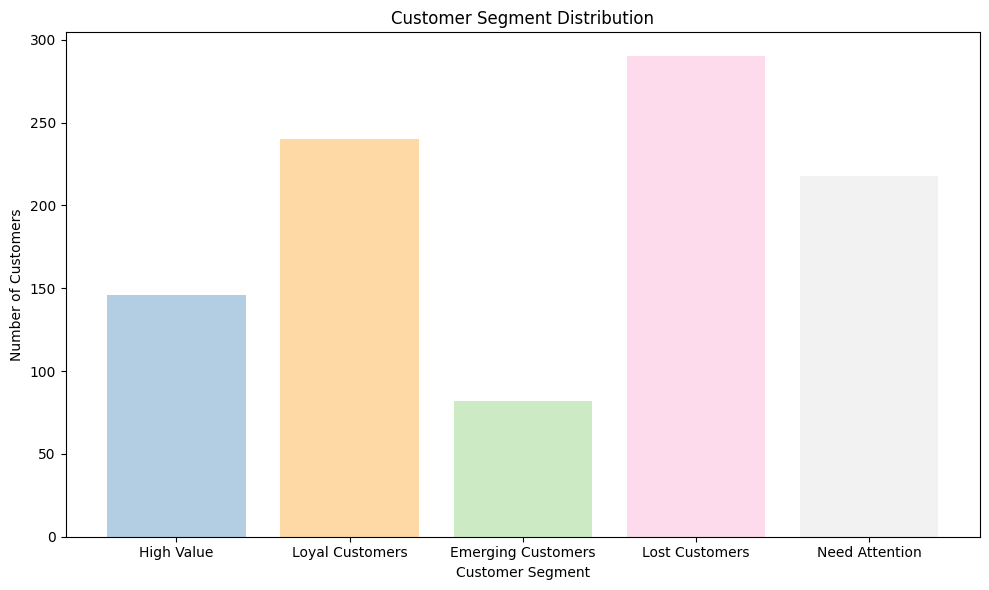

In [16]:

customer_segments = ['High Value','Loyal Customers', 'Emerging Customers','Lost Customers', 'Need Attention']
counts = [146,240,82,290,218]

plt.figure(figsize=(10, 6))
plt.bar(customer_segments, counts, color=['#B3CDE3', '#FED9A6', '#CCEBC5', '#FDDAEC', '#F2F2F2'])
plt.title('Customer Segment Distribution')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.tight_layout()  
plt.show()


Therefore, in order to maximise customer engagement across all segments, high-value customers should continue to get premium services and rewards for their loyalty; Personalised marketing and loyalty initiatives can help keep loyal customers; Personalised suggestions and welcome incentives can help elevate emerging customers and boost their transaction volume. Customers who are At Risk need to be specifically re-engaged with through campaigns and special renewal rates; Lost Customers should be convinced to return with customised solutions and incentives based on their feedback; and Customers who Need Attention require more personalised offers and promotions to boost their spending and loyalty.

## Clustering
K-means clustering and DBSCAN can be applied to segment customers based on their transactional behavior.By clustering customers based on transaction attributes such as Balance, Amount, and Category, we can identify groups of customers with similar spending patterns or preferences. Eg: High spenders, frequent shoppers, or users of specific services.

In [17]:
missing_values = df.isnull().sum()
print(missing_values)

Date                         229
Timestamp                    251
Account No                   224
Balance                      246
Amount                       209
Third Party Account No    223764
Third Party Name            7079
Category                       0
dtype: int64


In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans


#Group by 'Account No' and replace NaNs with the median for each group, so that all NaNs are filled with the median of their own remaining transactions
grouped = df.groupby('Account No')
df['Balance'] = grouped['Balance'].transform(lambda x: x.fillna(x.median()))
df['Amount'] = grouped['Amount'].transform(lambda x: x.fillna(x.median()))


#After this step we still had nulls in balance and amount as there were no other records for that Account No.
#Filling remaining NaNs after group-based imputation 
df['Balance'].fillna(df['Balance'].median(), inplace=True)
df['Amount'].fillna(df['Amount'].median(), inplace=True)

#Standardization
scaler = StandardScaler()
df[['Balance_scaled', 'Amount_scaled']] = scaler.fit_transform(df[['Balance', 'Amount']])

#Categorical Encoding using One-Hot Encoding
encoder = OneHotEncoder()
encoded_cats = encoder.fit_transform(df[['Category']]).toarray()
cat_feature_names = encoder.get_feature_names_out(['Category'])

df_encoded = pd.DataFrame(encoded_cats, columns=cat_feature_names, index=df.index)
df = pd.concat([df, df_encoded], axis=1)

Plotting the optimum number of clusters needed with the Elbow Plot

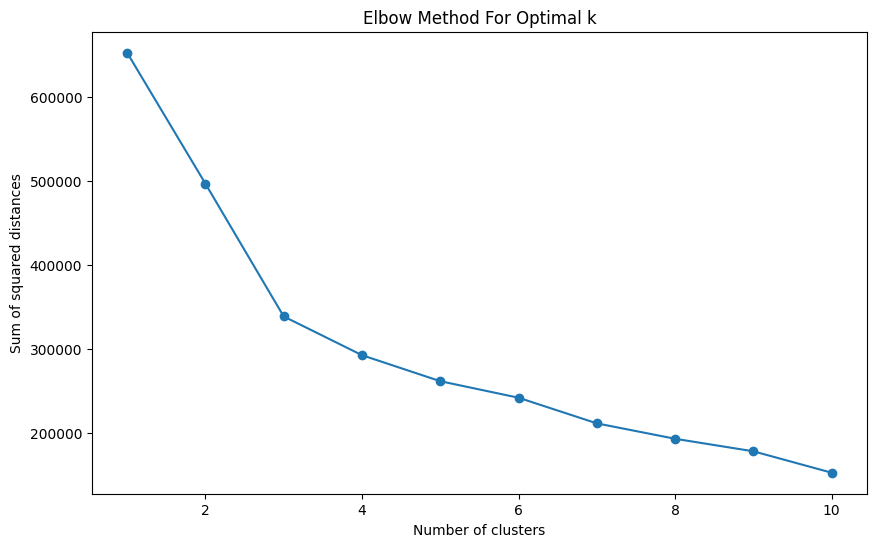

In [19]:
import matplotlib.pyplot as plt

#Calculating the sum of squared distances for different numbers of clusters
sse = []
for k in range(1, 11):  # Adjust the range as needed
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[['Balance_scaled', 'Amount_scaled'] + list(cat_feature_names)])
    sse.append(kmeans.inertia_)

#Plotting SSE to find the elbow
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.show()

In [20]:
#Clustering seems to be accurate with clusters ranging from 3-5. Therefore moving with 4 clusters.
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Balance_scaled', 'Amount_scaled'] + list(cat_feature_names)])

In [21]:
df['Cluster'].value_counts()

Cluster
3    137144
1     55465
0     30070
2      7917
Name: count, dtype: int64

## Principal Component Analysis (PCA) for Visualization


Using PCA to reduce the dimensionality of your data to 2 or 3 principal components can help visualize the clusters in a two-dimensional or three-dimensional space. This approach will allow us to plot the clusters and see how they are distributed, giving a visual intuition of how distinct they are.

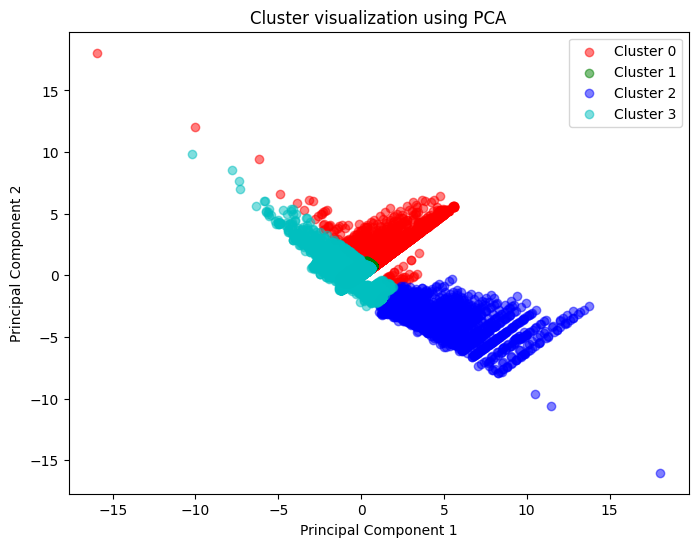

In [22]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#Reducing dimensions with PCA
pca = PCA(n_components=2)  # for 2D visualization
principal_components = pca.fit_transform(df[['Balance_scaled', 'Amount_scaled'] + list(cat_feature_names)])

#Creating a DataFrame with PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['principal component 1', 'principal component 2'])
pca_df['Cluster'] = df['Cluster']

#Plotting the clusters
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b', 'c']  
for i in range(kmeans.n_clusters):
    cluster_data = pca_df[pca_df['Cluster'] == i]
    plt.scatter(cluster_data['principal component 1'], cluster_data['principal component 2'], 
                color=colors[i], label=f'Cluster {i}', alpha=0.5)
plt.title('Cluster visualization using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [23]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#Applying DBSCAN to the standardized features
dbscan = DBSCAN(eps=0.5, min_samples=5)  #After tuning, these are the best parameter values
df['DBSCAN_Cluster'] = dbscan.fit_predict(df[['Balance', 'Amount'] + list(cat_feature_names)])

#Unique clusters we found 
print(f"Unique clusters found by DBSCAN: {len(set(df['DBSCAN_Cluster']))}")


Unique clusters found by DBSCAN: 414


After trying Clustering algorithms as DBSCAN and K-Means we observe that DBSCAN gives out a total of 414 clusters, therefore we would not visualize them. K-Means clustering with 4 clusters being the optimum nun=mber of clusters gives out clusters that are clearly plotted by the PCA plot. Therefore we prioritise K-Means clustering for this dataset.

## Time Series Forecasting (ARIMA)
Time series forecasting techniques such as ARIMA (AutoRegressive Integrated Moving Average)  is used to predict future transaction volumes to identify seasonal trends in customer behavior. They can guide resource allocation, marketing campaign planning, and inventory management.

In [24]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import warnings
df1 = pd.read_csv('simulated_transaction_2024.csv')
data = df1.copy()
data['Date'] = pd.to_datetime(data['Date'] + ' ' + data['Timestamp'], format='%d/%m/%Y %H:%M')
data.drop('Timestamp', axis=1, inplace=True) 
data = data.dropna(subset=['Date']) #Dropping columns with null dates as we need the most recent transaction date to calculate the forecast
data.sort_values('Date', inplace=True)

In [25]:
data['Date'].isnull().sum()

0

Creating the 'Daily Balance' such that, if there are multiple transactions on any particular date, the final balance of the day is taken as the actual balance for that particular date

In [26]:
last_transaction_dates = data.groupby('Account No')['Date'].max()
#Taking in account the last known balance for every account to create a daily balance time series
daily_balances = data.groupby('Account No').apply(
    lambda x: x.set_index('Date')['Balance'].resample('D').last().ffill())

Defining an ARIMA model to forecast the Balances for the next 30 days for all the accounts present in the dataset

In [27]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import warnings

def fit_and_forecast(timeseries, last_date):
    #Suppressing general warnings from statsmodels
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        model = ARIMA(timeseries, order=(1, 0, 1))
        fitted_model = model.fit()
        forecast = fitted_model.get_forecast(steps=30)
        forecast_df = forecast.summary_frame()
    
    #Adjusting the output to include the forecast date without time and forecasted balances directly
    forecast_df['Forecast Date'] = [(last_date + pd.DateOffset(days=i+1)).date() for i in range(30)]
    forecast_df['Forecasted Balance'] = forecast_df['mean']  #Rename 'mean' to 'Forecasted Balance'
    forecast_df['Account No'] = timeseries.name 

    return forecast_df[['Account No', 'Forecast Date', 'Forecasted Balance']]

In [28]:
#Applying the model to each account and store the results
forecasts = daily_balances.groupby(level=0).apply(
    lambda x: fit_and_forecast(x, last_transaction_dates[x.name])).reset_index(drop=True)

In [29]:
daily_balances.head(10)

Account No   Date      
101531259.0  2023-01-01   -778.49000
             2023-01-02   -778.49000
             2023-01-03   -778.49000
             2023-01-04   -778.49000
             2023-01-05   -778.49000
             2023-01-06   -778.49000
             2023-01-07   -871.91585
             2023-01-08   -871.91585
             2023-01-09   -871.91585
             2023-01-10   -871.91585
Name: Balance, dtype: float64

In the dataframe below, we can see the forecasted Balances for all accounts for the following month

In [30]:
forecasts.head(45)

,Account No,Forecast Date,Forecasted Balance
0,101531259.0,2023-12-06,191.548252
1,101531259.0,2023-12-07,168.958249
2,101531259.0,2023-12-08,147.622271
3,101531259.0,2023-12-09,127.470706
4,101531259.0,2023-12-10,108.437803
5,101531259.0,2023-12-11,90.461463
6,101531259.0,2023-12-12,73.483034
7,101531259.0,2023-12-13,57.447118
8,101531259.0,2023-12-14,42.301395
9,101531259.0,2023-12-15,27.996448


Importing all the forecasted balances in a new csv file

In [31]:
forecasts.to_csv("forecasts.csv")


## Churn prediction
 It is crucial for businesses as it helps identify customers likely to leave or stop using services, allowing bank to proactively engage with these individuals and implement retention strategies to decrease turnover. This predictive insight supports better resource allocation, improves customer satisfaction, and increases overall profitability by retaining valuable customers and reducing the costs associated with acquiring new ones. Overall, effective churn prediction models empower businesses to create more personalized experiences and strengthen customer loyalty.

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score, confusion_matrix
from catboost import CatBoostClassifier


df = pd.read_csv('simulated_transaction_2024.csv')

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
current_date = df['Date'].max() + pd.Timedelta(days=1)
df['Days_since_last_transaction'] = (current_date - df.groupby('Account No')['Date'].transform('max')).dt.days
df['Churn'] = (df['Days_since_last_transaction'] > 90).astype(int)

#Preparing training and target features
features = df[['Balance', 'Amount']]
labels = df['Churn']

#Handling missing values by calculating mean 
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

Applying Standardization to the features to scale them to standard format

In [33]:
#Scaling features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_imputed)

#Split the data into training and test sets using 80-20 split
X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.2, random_state=42)


catboost_model = CatBoostClassifier(
    iterations=1000,
    l2_leaf_reg=3,
    learning_rate=0.1,
    depth=3,
    eval_metric='AUC',
    verbose=200,
    class_weights=[0.5, 40]   #calculated class_Weights by seeing the imbalance in the data
)
catboost_model.fit(X_train, y_train, eval_set=(X_test, y_test), use_best_model=True)

0:	test: 0.8044263	best: 0.8044263 (0)	total: 170ms	remaining: 2m 49s
200:	test: 0.8920121	best: 0.8959313 (149)	total: 4.55s	remaining: 18.1s
400:	test: 0.8910427	best: 0.8959313 (149)	total: 8.94s	remaining: 13.4s
600:	test: 0.8902915	best: 0.8959313 (149)	total: 13.1s	remaining: 8.69s
800:	test: 0.8878598	best: 0.8959313 (149)	total: 17.2s	remaining: 4.28s
999:	test: 0.8867531	best: 0.8959313 (149)	total: 21.4s	remaining: 0us

bestTest = 0.8959313496
bestIteration = 149

Shrink model to first 150 iterations.


In [34]:
#Making predictions for the full dataset
full_predictions = catboost_model.predict(features_scaled)
df['Predicted_Class'] = full_predictions

In [35]:
#Evaluating the model
y_train_pred = catboost_model.predict(X_train)
y_test_pred = catboost_model.predict(X_test)
auc_train = roc_auc_score(y_train, catboost_model.predict_proba(X_train)[:, 1])
auc_test = roc_auc_score(y_test, catboost_model.predict_proba(X_test)[:, 1])

#AUC scores and confusion matrices
print(f"AUC Score - Training: {auc_train}")
print(f"AUC Score - Testing: {auc_test}")

AUC Score - Training: 0.9159616870912632
AUC Score - Testing: 0.8959313495574864


In [36]:
#Grouping predictions by account as there are multiple records for an account, therefore grouping them so that we can have 1 value
final_predictions = df.groupby('Account No').agg({
    'Predicted_Class': lambda x: x.value_counts().idxmax(),  #Most frequent prediction 
    'Churn': 'first'  #Fetches the first instance of churn status (it does not matter as whether the account was churned or not would be 
    #same accross for the account no)
}).reset_index()

final_predictions.rename(columns={"Churn":"Actual_class"},inplace= True)

final_predictions.to_csv('final_churn_predictions.csv', index=False)
print("Predictions for distinct accounts with actuals have been saved to 'final_churn_predictions.csv'.")

Predictions for distinct accounts with actuals have been saved to 'final_churn_predictions.csv'.


In [37]:
#Confusion matrix using final predictions
final_confusion_matrix = confusion_matrix(final_predictions['Actual_class'], final_predictions['Predicted_Class'])
print("Confusion Matrix - Aggregated Final Predictions:")
print(final_confusion_matrix)

Confusion Matrix - Aggregated Final Predictions:
[[962   5]
 [  3   6]]


In [38]:
final_predictions.head()

,Account No,Predicted_Class,Actual_class
0,101531259.0,0,0
1,104832000.0,0,0
2,105375973.0,0,0
3,106601471.0,0,0
4,108481285.0,0,0


In [39]:
final_predictions.loc[final_predictions['Actual_class'] == 1]

,Account No,Predicted_Class,Actual_class
89,183546640.0,1,1
210,293191074.0,0,1
276,357651163.0,1,1
433,509627909.0,1,1
488,554771381.0,0,1
500,567499591.0,1,1
525,592961759.0,1,1
623,671824917.0,0,1
649,690941877.0,1,1
